# Food in the Time of Coronavirus: Past and present

Kathleen DeBrota

Independent Study: Summer 2020

The ongoing coronavirus (COVID-19) pandemic has caused a major upheaval in every part of life in the US and across the world. A radical change in people's behavior across the board was triggered almost overnight as sweeping governmental lockdown measures were imposed, stores were closed, events were cancelled, and travel ceased. These changes have naturally caused changes to purchasing behavior, not only because of the physical shutdown of many non-essential retail businesses and restaurants, but also because of the sudden reduction in purchasing power of the American public as millions of people lost their jobs. 

Food, always central to life, health, and happiness, has been prioritized even more than usual during the pandemic. Much of the news coverage during the earliest weeks was dedicated to the frenzied 'stocking-up' purchasing that was beginning to occur nationwide as the virus began to spread. People feared they would be left without essential food and health care items, and panic-buying became the norm; grocery store shelves were emptied as people bought huge quantities of nonperishables, paper goods, and cleaning products. Now, about four months in to the shutdown, panic-buying is less common but most restaurants and bars are still closed. Food-purchasing behavior as a whole has been seemingly forced back toward the 'cooking at home' norm, as even while restaurants are now beginning to reopen, their capacities are limited and many are too afraid to risk catching the virus by going out to eat. For the food industry as a whole, 2020 has seen a massive upheaval in both directions. Studying food illuminates a lot about human behavior and American priorities amidst this challenge to our daily lives and routines. Data is beginning to emerge which is illuminating the true scope of this pandemic in every sector of the economy. 

In this notebook and its accompanying Observable chart pages, the following questions were explored:

- How has COVID-19 impacted the US in terms of food purchases, dining out, and stocking-up behaviors?
- When did people begin stocking-up behaviors and how does it correlate to COVID case-loads (if at all)? 
- Where do Americans spend their food budgets - at home or away from home? How is that changing due to the virus?
- What are the historical production and sales trends for fresh vegetables in the US? How might this change going forward?
- How has the retail economy as a whole been affected by COVID-19? Is this worse than the 2008 recession?
- What would have been the food sales trend had COVID not occurred?

Ideally, all of the data used in this notebook would have been current enough to include explorations of Jan - Apr 2020, but some data includes dates only up to Dec 2019. However, exploring it here provides useful perspective for comparison upon release of the new data. 

### Import data

In [92]:
import numpy as np
import scipy
import matplotlib
import seaborn
import pandas as pd
import altair
import vega_datasets
import sklearn
import bokeh
import datashader
import holoviews
import wordcloud
import spacy

# Total supply minus production (to show how importing habits per veg have changed over time)
# Get the fruit data from ERS
# Check for updated data for Apr/May
# compare total veg against total fruit
# food bank data
# analysis: by how much did food sales go up and by how much did food service go down in a tabular fashion
# what is the month by month anticipated delay/change
# forecasting??
# Correlation of the data with itself/other categories
# use other retail stores and categories to talk about impact of covid

# Meeting discussion notes
##### What should the final product be? What is deliverable - report within this notebook?
##### Discussion of how to incorporate the new data as it comes in (COVID and ERS data both)?
##### What else should I include?
##### Build in the data cleaning steps to this nb so that it's streamlined maybe?
##### How to rotate the x axis labels w/sns (see below)?

#### Monthly expenditures data (ERS)

In [141]:
# Monthly expenditures data, ERS (USDA) Updated Feb 25, 2020
# How much people spent on food; should mirror the census information.
#Note, 'constant dollar' refers to 1988 = 100
monthly_sales=pd.read_csv('../data/monthly_sales_cleaned.csv')
monthly_sales.head()

Year      Month FAH_nominal_wtax_wtips_million  \
0  2019.0   December                      74,901.67   
1  2019.0   November                      69,798.19   
2  2019.0    October                      67,301.77   
3  2019.0  September                      64,101.42   
4  2019.0     August                      69,333.52   

  FAFH_nominal_wtax_wtips_million Total_nominal_food_sales_million  \
0                       73,337.91                       148,239.58   
1                       69,585.45                       139,383.64   
2                       71,609.53                       138,911.30   
3                       69,391.72                       133,493.14   
4                       75,675.25                       145,008.77   

  FAH_constdollar_million FAFH_constdollar_million  \
0               36,125.06                31,012.62   
1               33,666.99                29,510.12   
2               32,380.60                30,417.63   
3               30,942.60                29,531.69   
4               33,522.32                32,289.19   

  Total_constant_dollar_food_sales_million  
0                                67,423.64  
1                                63,482.68  
2                                63,227.35  
3                                60,922.88  
4                                66,314.81

#### Census data

Source: https://www.census.gov/econ/currentdata/dbsearch?program=MARTS&startYear=1992&endYear=2020&categories%5B%5D=445&categories%5B%5D=4451&categories%5B%5D=446&categories%5B%5D=722&dataType=SM&geoLevel=US&adjusted=1&notAdjusted=1&submit=GET+DATA&releaseScheduleId=


In [94]:
# Census data
census = pd.read_csv('../data/census_data_food_only.csv')
census_dates= pd.read_csv('../data/census_per_index_dates.csv')

In [95]:
# Census data: selected cat_idx including other sectors of economy
# (not just food)
census_econ = pd.read_csv('../data/census_thru_april_selected.csv')
census_econ.head()

per_idx  cat_idx  dt_idx  et_idx  geo_idx  is_adj      val
0        1        6       1       0        1       0  29811.0
1        1        6       1       0        1       1  33478.0
2        1        8       1       0        1       0   3846.0
3        1        8       1       0        1       1   4254.0
4        1        9       1       0        1       0   3657.0

#### COVID-19 data

Source: https://docs.google.com/spreadsheets/u/2/d/e/2PACX-1vRwAqp96T9sYYq2-i7Tj0pvTf6XVHjDSMIKBdZHXiCGGdNC0ypEU9NbngS8mxea55JuCFuua1MUeOj5/pubhtml#


In [96]:
# COVID-19 data: (COLLECTED 9:37pm on 5/2/2020)
covid = pd.read_csv('../data/COVID19_cases_may20_2020.csv')
covid.head()

Date_int       Date  States  Positive    Negative  Pending  \
0  20200520  5/20/2020      56   1542309  11105482.0   2973.0   
1  20200519  5/19/2020      56   1520778  10713209.0   2944.0   
2  20200518  5/18/2020      56   1499722  10334786.0   3596.0   
3  20200517  5/17/2020      56   1480158  10016330.0   3449.0   
4  20200516  5/16/2020      56   1459421   9633108.0   3788.0   

   Hospitalized_Currently  Hospitalized_Cumulative  In_ICU_Currently  \
0                 40884.0                 161616.0            9829.0   
1                 41174.0                 159634.0            9829.0   
2                 40933.0                 157963.0           10015.0   
3                 41108.0                 156905.0           10164.0   
4                 42896.0                 155726.0           10509.0   

   In_ICU_Cumulative  On Ventilator_Currently  On Ventilator_Cumulative  \
0             7319.0                   4911.0                     613.0   
1             7217.0                   5032.0                     606.0   
2             7064.0                   5257.0                     602.0   
3             7003.0                   5467.0                     593.0   
4             6945.0                   5529.0                     592.0   

   Recovered   Deaths  
0   294312.0  87472.0  
1   289392.0  86070.0  
2   283178.0  84640.0  
3   272265.0  83854.0  
4   268376.0  83015.0

#### Vegetables data

Source: https://www.ers.usda.gov/data-products/vegetables-and-pulses-data/vegetables-and-pulses-yearbook-tables/

In [97]:
# Vegetables_pulses data: from USDA/ERS
vegetables = pd.read_csv('../data/Vegetables_Pulses/Vegetables_Pulses.csv')
vegetables.head()

# Transposed version for use in Observable
freshveg_production=pd.read_csv('../data/freshvegproduction_transpose.csv')
freshveg_production.head()

Year  Asparagus  Broccoli  Cabbage  Carrots  Cauliflower  Cucumbers  \
0  1970       97.4     109.2   1866.9   1218.2        151.9      447.8   
1  1971       85.8     149.6   1921.5   1287.1        143.4      432.6   
2  1972       94.7     147.4   1861.1   1402.1        175.1      470.2   
3  1973       88.0     160.7   1990.7   1435.7        160.2      420.6   
4  1974       84.9     168.2   1971.2   1473.9        168.3      467.6   

   Head Lettuce  Leaf & Romaine Lettuce  Mushrooms  Onions  Snap beans  \
0        4836.5                     0.0       58.3  2602.3       312.0   
1        4936.7                     0.0       66.3  2490.3       309.6   
2        5047.0                     0.0       76.7  2449.5       313.7   
3        5243.5                     0.0      102.3  2501.8       303.3   
4        5323.1                     0.0      126.1  2747.9       292.0   

   Spinach  Sweet Corn  Tomatoes  
0     61.1      1594.2    1933.4  
1     63.3      1547.4    1887.7  
2     59.4      1630.4    2088.5  
3     62.8      1675.8    2043.1  
4     60.7      1652.9    2098.1

### Census data for selected retail and foodservice sectors



Let's explore the census data.

This data gives "Advance monthly sales for retail and food services", one data point per month for all years between Jan 1992 and April 2020. In this case, we've selected only the data related to food service and grocery stores/food retail stores. Because this includes information from before and during the COVID-19 pandemic, we should be able to get an idea of what changes have occurred as a result of the outbreak. 

- per_idx is the period index or date at which the data was collected. These correspond to actual date values.
- dt_idx describes the data type: 1 = Monthly sales in millions of US dollars. 2 = Monthly sales % change.
- et_idx describes error types: 1 = CV of sales, monthly. 2 = SE of sales, monthly % change.
- is_adj refers to whether or not the data was (1) or was not (0) seasonally adjusted.
- val = monthly sales value in millions of US dollars from (in this case) grocery stores.

All data was taken over the entire US as a whole.
Data source: US Census

In [168]:
#census.head()

In [99]:
#census.describe()

#### Joining correct per_name column

In [100]:
census = census.merge(census_dates, how = 'left', on = 'per_idx')
census['per_name']=pd.to_datetime(census['per_name'], format='%m/%d/%Y')
census.head()

per_idx  cat_idx  dt_idx  et_idx  geo_idx  is_adj      val  \
0        1       11       1       0        1       0  29589.0   
1        1       11       1       0        1       1  30437.0   
2        1       12       1       0        1       0  27306.0   
3        1       12       1       0        1       1  27835.0   
4        1       21       1       0        1       0  15693.0   

             cat_name   per_name  
0     food_bev_stores 1992-01-01  
1     food_bev_stores 1992-01-01  
2      grocery_stores 1992-01-01  
3      grocery_stores 1992-01-01  
4  food_drink_service 1992-01-01

In [101]:
census_econ = census_econ.merge(census_dates, how='left', on = 'per_idx')
census_econ['per_name']= pd.to_datetime(census_econ['per_name'], format='%m/%d/%Y')

In [102]:
# census_econ needs to have cat_name joined as well
cat_idx_codes = pd.read_csv('../data/cat_idx_codes_all.csv')
census_econ = census_econ.merge(cat_idx_codes, how='left', on='cat_idx')
census_econ.head()

per_idx  cat_idx  dt_idx  et_idx  geo_idx  is_adj      val   per_name  \
0        1        6       1       0        1       0  29811.0 1992-01-01   
1        1        6       1       0        1       1  33478.0 1992-01-01   
2        1        8       1       0        1       0   3846.0 1992-01-01   
3        1        8       1       0        1       1   4254.0 1992-01-01   
4        1        9       1       0        1       0   3657.0 1992-01-01   

                 cat_name  
0             car_dealers  
1             car_dealers  
2               furniture  
3               furniture  
4  electronics_appliances

#### Filtering data

In [103]:
# Only dollar data, separated by adjusted/unadjusted
census_unadj = census[(census['is_adj'] < 1) & (census['dt_idx'] == 1)] # this is $ data
census_adj = census[(census['is_adj'] == 1) & (census['dt_idx'] == 1)] # this is $ data

# Only percentage data, separated by adjusted/unadjusted
census_unadj_pct = census[(census['is_adj'] < 1) & (census['dt_idx'] == 2)] # this is % data
census_adj_pct = census[(census['is_adj'] == 1) & (census['dt_idx'] == 2)] # this is % data

#### Line plots: Census data, 1992-2020


[Text(0, 0.5, 'Total Sales, Million $'),
 Text(0.5, 0, 'Date'),
 Text(0.5, 1.0, 'Total US Adjusted Grocery and Foodservice Sales')]

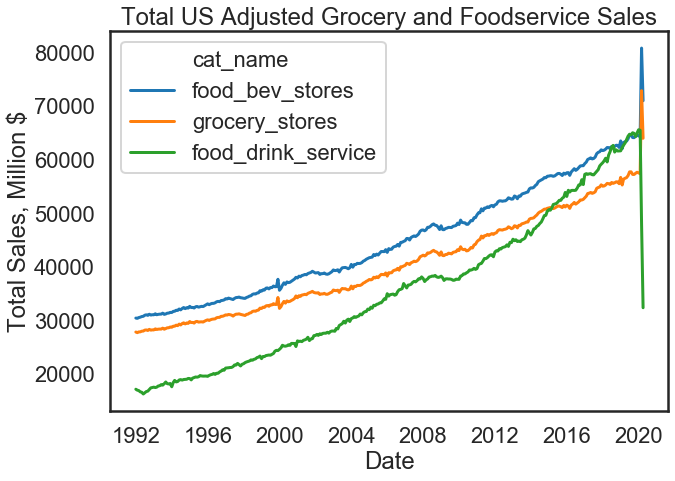

In [104]:
plotsize=(10,7)
sns.set_style("white")
sns.set_context("poster")
fig, ax = plt.subplots(figsize=plotsize)
sns.lineplot(ax=ax, x="per_name", y="val", hue='cat_name',data=census_adj)
#ax2 = plt.twinx()
#sns.lineplot(ax=ax2, x = 'per_name', y = 'val', hue='cat_idx', color= 'b', data= census_unadj)

ax.set(xlabel='Date', ylabel='Total Sales, Million $', title='Total US Adjusted Grocery and Foodservice Sales')

Nothing even close to this level of disruption has occurred in the food and beverage/food service markets since at least 1992. This is the obvious takeaway from the graph above, but we can also see that in the mid 2010s, gross adjusted total US food/drink service sales overtook that of grocery stores, and continued rising to meet or exceed total sales from all types of food and beverage stores in the late 2010s. In fact, this line seems to have begun accelerating at around the same time (approx 2013 or so). 

This is interesting, as it means we as a country had just begun to pay as much or more for food away-from-home as we did for food at-home, at least until earlier this year. People were going out to restaurants and bars and spending more than they ever were before (especially considering these are adjusted dollars) until the Coronavirus crisis hit. 



#### Linear regression

C:\Users\kdebr\Anaconda3\envs\dviz\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\kdebr\Anaconda3\envs\dviz\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


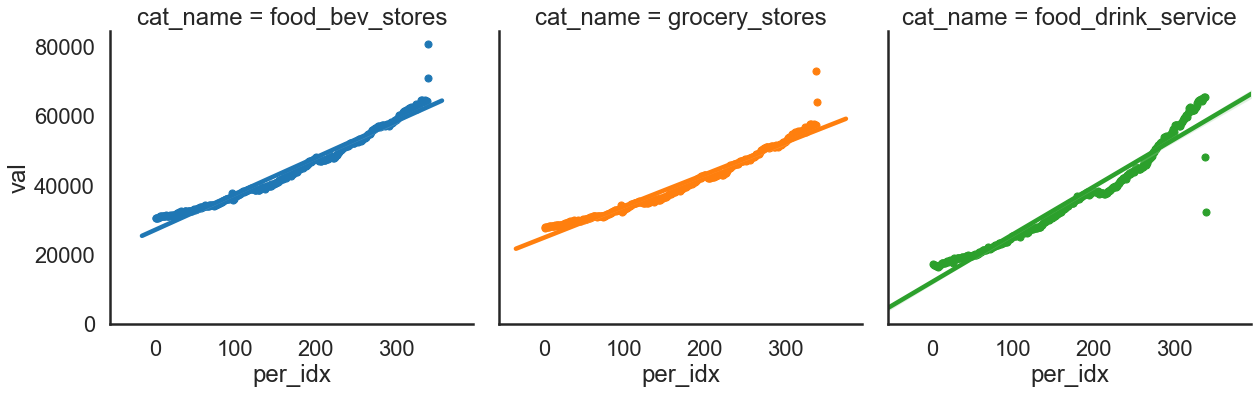

In [105]:
sns.set_context("poster")
g = sns.FacetGrid(census_adj, col="cat_name", hue='cat_name', size=6,  margin_titles=False)
g.map(sns.regplot, "per_idx", "val", fit_reg=True, scatter_kws={"s": 50, "alpha": 1})

Linear regression on the census data (adjusted) shows quite linear behavior with some curvature (concave). The `food_drink_service` shows the most un-linear behavior of the three selected, and seems steeper than the linear regression line would indicate. This could be better represented by a polynomial curve. We can clearly see the outliers from 2020 in all three cases!

#### Nonlinear regression

Does the census data fit better to a nonlinear expression?

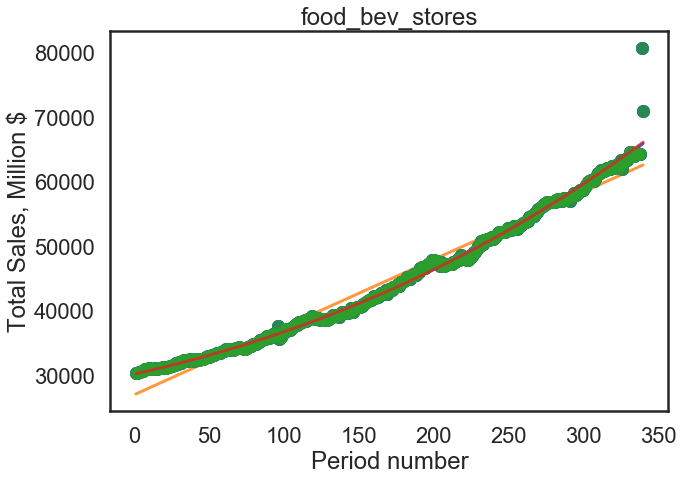

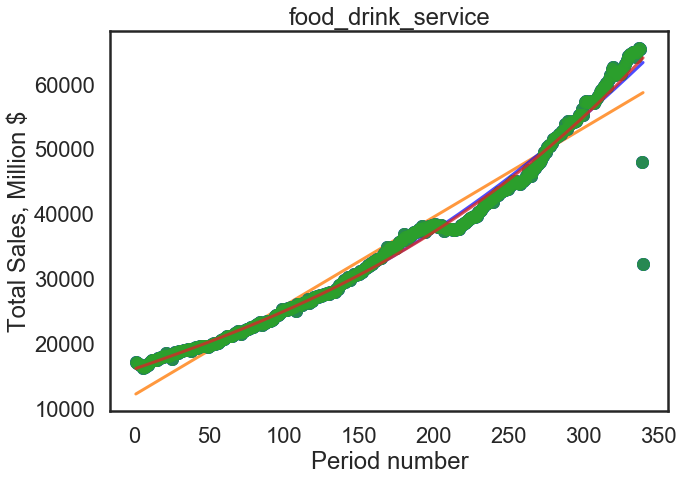

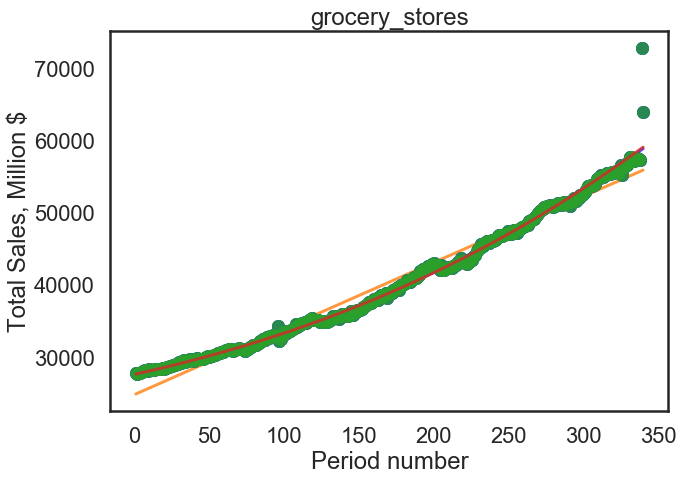

In [106]:
residuals=[]

for name, group in census_adj.groupby('cat_name'):
    
    poly_coefs_all1 =np.polyfit(group['per_idx'], group['val'], 1, full=True)
    poly_coefs1 =np.polyfit(group['per_idx'], group['val'], 1)
    #print(name, 'linear residuals')
    #print (poly_coefs_all1[1])
    
    poly_coefs_all2 =np.polyfit(group['per_idx'], group['val'], 2, full=True)
    poly_coefs2 =np.polyfit(group['per_idx'], group['val'], 2)
    #print(name, 'second order residuals')
    #print (poly_coefs_all2[1])
    
    poly_coefs_all3 =np.polyfit(group['per_idx'], group['val'], 3, full=True)
    poly_coefs3 =np.polyfit(group['per_idx'], group['val'], 3)
    #print(name, 'third order residuals')
    #print (poly_coefs_all3[1])
    
    curveobject = np.poly1d(poly_coefs1)
    curveobject2 = np.poly1d(poly_coefs2)
    curveobject3 = np.poly1d(poly_coefs3)
    
    new_y = curveobject(group['per_idx'])
    new_y2= curveobject2(group['per_idx'])
    new_y3= curveobject3(group['per_idx'])
    
    plotsize=(10,7)
    fig, ax = plt.subplots(figsize=plotsize)
    plt.plot(group['per_idx'], group['val'], "o", group['per_idx'],  new_y,  alpha=0.8)
    plt.xlabel('Period number')
    plt.ylabel('Total Sales, Million $')
    plt.title(name)
    plt.plot(group['per_idx'], group['val'], "o", group['per_idx'],  new_y2, color='b', alpha=0.7)
    plt.plot(group['per_idx'], group['val'], "o", group['per_idx'], new_y3, alpha=0.8)
    
    residuals.append([poly_coefs_all1[1], poly_coefs_all2[1], poly_coefs_all3[1]])
   # residuals.append(poly_coefs_all2[1])
   # residuals.append(poly_coefs_all3[1])
    #residuals=[poly_coefs_all1[1], poly_coefs_all2[1], poly_coefs_all3[1] ]



From the linear regression above, we can see that a second-order polynomial fits the data much better than a straight line (orange). The residuals decrease as the order of the polynomial increases, but the margin of decrease is small between a second and third order polynomial (it's hard to even see the difference between the 2nd and 3rd order curves (red and blue)). Exploring this difference below, we can see the same thing is true:

In [107]:
#print(residuals)

In [108]:
resid_df=pd.DataFrame(data=residuals, columns=('1st', '2nd', '3rd'))
resid_transpose=resid_df.transpose()
print (resid_transpose)

                        0                     1                     2
1st  [1098598778.6655536]  [3177783022.2634773]   [909376153.0171636]
2nd   [334342743.9892146]  [1685951439.2634592]   [298222772.6254784]
3rd   [332553185.0119066]  [1660487248.2841628]  [296029428.83317095]


Text(0, 0.5, 'Sum of squared residuals')

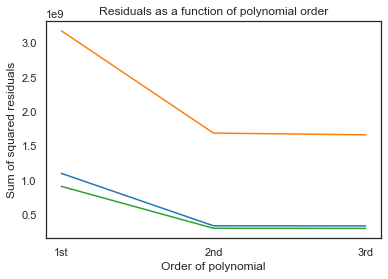

In [109]:
sns.set_context("notebook")
#poly_orders=np.array([1,2,3])
plt.plot(resid_transpose)
plt.title('Residuals as a function of polynomial order')
plt.xlabel('Order of polynomial')
plt.ylabel('Sum of squared residuals')


Thus, we should model the total sales (for all three categories) with a 2nd degree polynomial, which performs better than a line. We don't want to over-fit the data, and by increasing to a 3rd order we are not gaining very much in terms of reducing our error. 

#### Line plots: Census data, last 5 years

[(40000, 85000)]

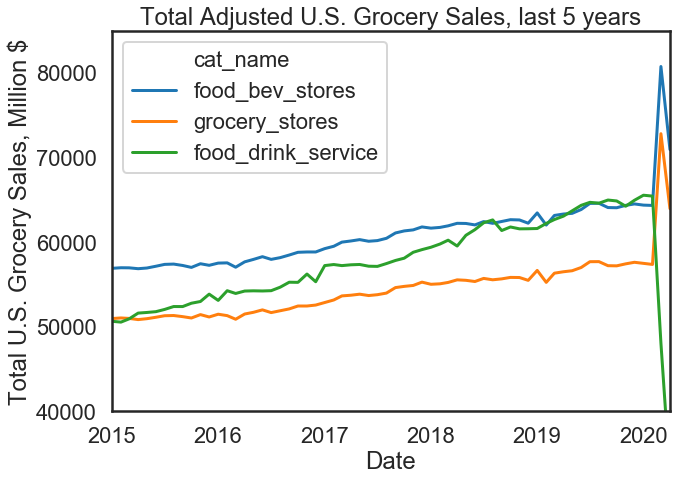

In [110]:
plotsize=(10,7)
sns.set_style("white")
sns.set_context("poster")
fig, ax = plt.subplots(figsize=plotsize)
sns.lineplot(ax=ax, x="per_name", y="val", hue='cat_name',data=census_adj)

ax.set(xlabel='Date', ylabel='Total U.S. Grocery Sales, Million $', title='Total Adjusted U.S. Grocery Sales, last 5 years')
ax.set(xlim=(datetime.date(2015,1,1), datetime.date(2020,4,1)))
ax.set(ylim=(40000,85000))

#### Line plots: Percentage data

[Text(0, 0.5, 'Total U.S. Grocery Sales, Million $'),
 Text(0.5, 0, 'Date'),
 Text(0.5, 1.0, 'Total Adjusted U.S. Grocery Sales, 1992-2020')]

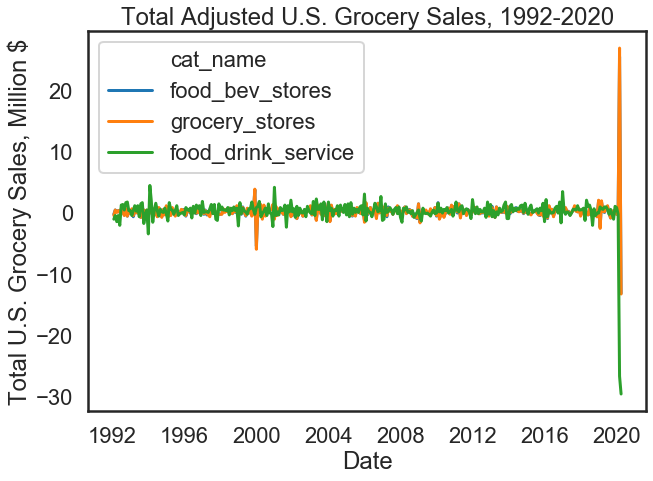

In [111]:
plotsize=(10,7)
sns.set_style("white")
sns.set_context("poster")
fig, ax = plt.subplots(figsize=plotsize)
sns.lineplot(ax=ax, x="per_name", y="val", hue='cat_name',data=census_adj_pct)

ax.set(xlabel='Date', ylabel='Total U.S. Grocery Sales, Million $', title='Total Adjusted U.S. Grocery Sales, 1992-2020')


Apparently the blue line (food_bev_stores) does not exist in percentage data in this dataset; this could be because it's a grouped category made up of other smaller subcategories.

[(735599.0, 737516.0)]

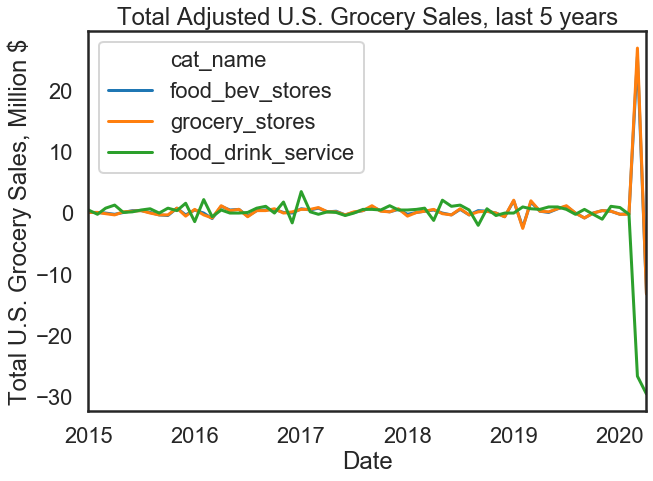

In [112]:
plotsize=(10,7)
sns.set_style("white")
sns.set_context("poster")
fig, ax = plt.subplots(figsize=plotsize)
sns.lineplot(ax=ax, x="per_name", y="val", hue='cat_name',data=census_adj_pct)
ax.set(xlabel='Date', ylabel='Total U.S. Grocery Sales, Million $', title='Total Adjusted U.S. Grocery Sales, last 5 years')
ax.set(xlim=(datetime.date(2015,1,1), datetime.date(2020,4,1)))

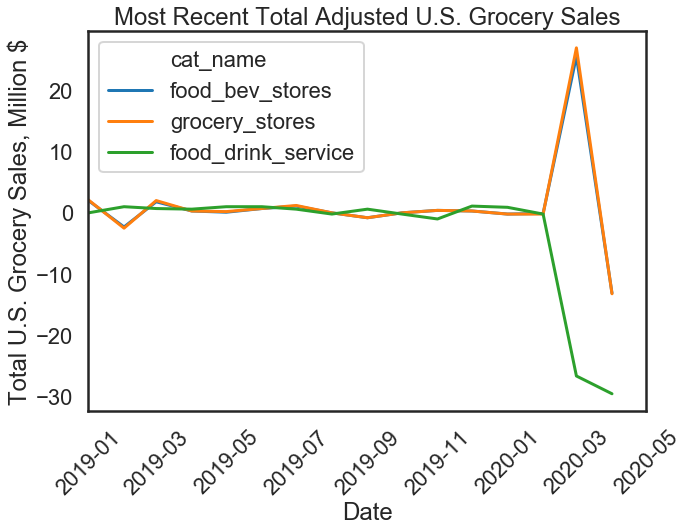

In [158]:
plotsize=(10,7)
sns.set_style("white")
sns.set_context("poster")
fig, ax = plt.subplots(figsize=plotsize)
g=sns.lineplot(ax=ax, x="per_name", y="val", hue='cat_name',data=census_adj_pct)

ax.set(xlabel='Date', ylabel='Total U.S. Grocery Sales, Million $', title='Most Recent Total Adjusted U.S. Grocery Sales')

ax.set(xlim=(datetime.date(2019,1,1), datetime.date(2020,5,1)))
for item in g.get_xticklabels():
    item.set_rotation(45)

We can see the striking and intense downward trend of the food and drink service industry sales (green) corresponding exactly and inversely to the uptick in grocery store sales (orange). Unquestionably, this is a direct result of the COVID-19 pandemic stay-at-home orders and shutdowns of restaurants and bars.

### Cross-economic-sector census data

Let's compare the above to what we see in other sectors of the economy over the same time frame.

In [159]:
census_econ_adj_pct = census_econ[(census_econ['is_adj'] ==1)& (census_econ['dt_idx']== 2)] 
# this is adjusted percentage change 
census_econ_adj_pct.to_csv(r'../data/census_econ_adj_pct.csv', index=False)

[Text(0, 0.5, 'Total Sales, Million $'),
 Text(0.5, 0, 'Date'),
 Text(0.5, 1.0, 'Total US Adjusted Sales')]

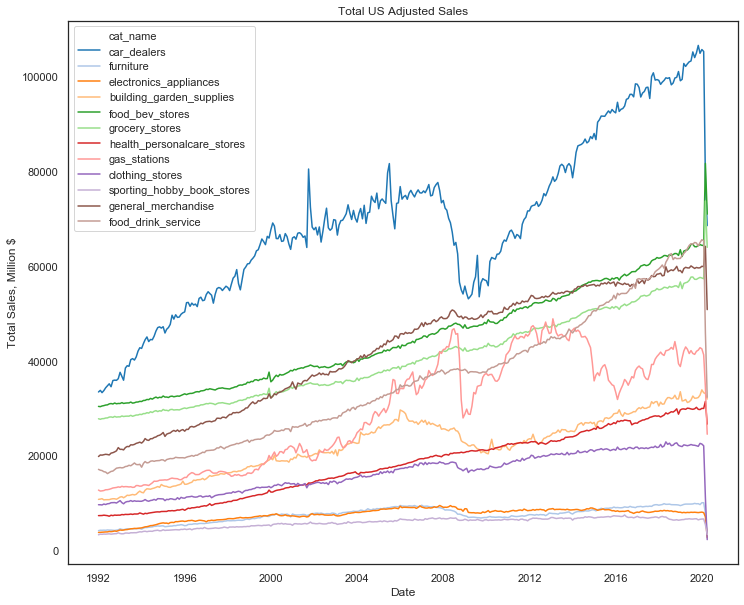

In [167]:
census_econ_adj = census_econ[(census_econ['is_adj'] == 1) & (census_econ['dt_idx'] == 1)] # this is $ data
census_econ_adj.to_csv(r'../data/census_econ_adjusted.csv', index = False)

plotsize=(12,10)
sns.set_style("white")
sns.set_context("notebook")
fig, ax = plt.subplots(figsize=plotsize)
palette=sns.color_palette("tab20", 12)
sns.lineplot(ax=ax, x="per_name", y="val", hue='cat_name', palette=palette, data=census_econ_adj)

ax.set(xlabel='Date', ylabel='Total Sales, Million $', title='Total US Adjusted Sales')


This is interesting because we can see the 2008 financial crisis clearly in the `car_dealers` and `gas_stations` variables, and a few others. Fewer people were buying cars during that crisis, but we can see an even more rapid (nearly immediate) decline happening now due to the coronavirus outbreak. 

The current crisis, so far, looks the most abrupt and severe of any in this data range by large margin. Compared to the 2008 crisis, it's not only more comprehensive (all sectors affected) but more immediate (curve is extremely steep) and the negative impacts are more severe overall. 

An interactive version of this chart can be explored here:
https://observablehq.com/@kdebrota/total-adjusted-us-retail-sales-by-sector-1992-2020

#### Zooming in on the past year

It will be easier to compare against what has happened over the past 12 months or so by visualizing only a section of the above data. 

[(737060.0, 737516.0)]

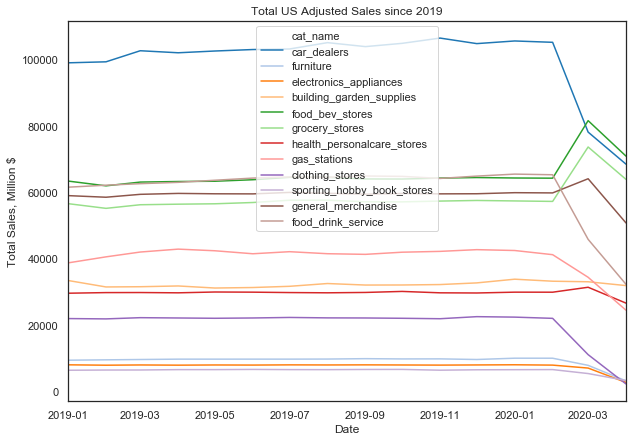

In [117]:
plotsize=(10,7)
sns.set_style("white")
sns.set_context("notebook")
fig, ax = plt.subplots(figsize=plotsize)
sns.lineplot(ax=ax, x="per_name", y="val", hue='cat_name', palette = palette, data=census_econ_adj)

ax.set(xlabel='Date', ylabel='Total Sales, Million $', title='Total US Adjusted Sales since 2019')

ax.set(xlim=(datetime.date(2019,1,1), datetime.date(2020,4,1)))


Zooming in, we can see that adjusted sales in all selected economic sectors were very stable until February 2020. Only grocery stores and food/beverage stores (of the selected sectors shown here) saw any increase in sales (as we explored earlier) and all other sectors have experienced significant or disastrous declines. Many are still declining as of April. Grocery stores and other food retailers are showing a decline probably back down to near-normal levels (though we will need to wait for the rest of the data for that). It's possible they too will experience deficits in the near future as things rebound from the initial stock-up phase and as more of the economy begins to reopen.

Some sectors show steeper declines than others (`food_drink_service` for example is one of the steepest due to many mandatory closures). Some stores were allowed to remain open as they were classified as essential. From this graph we can analyze the raw numbers (in millions of dolars) but it will be more useful to examine the % change per industry to get a clearer comparison of what the imapct of the virus has been on each business type.

That chart can be explored here:
https://observablehq.com/@kdebrota/monthly-change-total-adjusted-us-retail-sales-by-sector-201

And zooming in on just the past few months, from Oct 2019 - April 2020:
https://observablehq.com/@kdebrota/monthly-change-total-adjusted-us-retail-sales-by-sector-201/2

In those charts, it's abundantly clear which industries were hit harder than others. Clothing stores saw around an 80% drop in sales, while electronics and furniture stores saw more than 50% decreases. These non-essential retail stores were disproportionately affected by the lockdown and have experienced severe decreases in sales. It is striking as well to see just how large the percent changes are when compared to the rest of the time frame.

Next we will explore people's usual food-buying tendencies by looking at the amount of money people in the US generally spend on food.


### Sales data: Food at home vs. away from home 

#### Data cleaning and fixing data types

In [139]:
monthly_sales.dropna()
print(monthly_sales.head(1))

     Year     Month  FAH_nominal_wtax_wtips_million  \
0  2019.0  December                    74901.671875   

   FAFH_nominal_wtax_wtips_million  Total_nominal_food_sales_million  \
0                      73337.90625                     148239.578125   

   FAH_constdollar_million  FAFH_constdollar_million  \
0             36125.058594              31012.619141   

   Total_constant_dollar_food_sales_million  
0                              67423.640625  


In [142]:
#Change dtypes from 'object' to float for other columns besides month

numcols=["FAH_nominal_wtax_wtips_million", 
               "FAFH_nominal_wtax_wtips_million", 
               "Total_nominal_food_sales_million", 
               "FAH_constdollar_million", 
               "FAFH_constdollar_million", 
               "Total_constant_dollar_food_sales_million"]

# Remove commas
monthly_sales[numcols] = monthly_sales[numcols].replace({',': ''}, regex=True)

#Convert strings without commas into numeric values
monthly_sales[monthly_sales.columns[2:]] = monthly_sales[monthly_sales.columns[2:]].apply(pd.to_numeric, downcast='float')
monthly_sales.dtypes.value_counts()

float32    6
object     1
float64    1
dtype: int64

The data spans 1997 to December 2019. 

FAH = "Food At Home"
FAFH = "Food Away From Home"

Does not include schools/institutions. Data is in millions of US dollars. Values are total monthly sales.

[Text(0, 0.5, 'Millions of dollars'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'How much the US spent on food at home and away from home (thru Dec 2019)')]

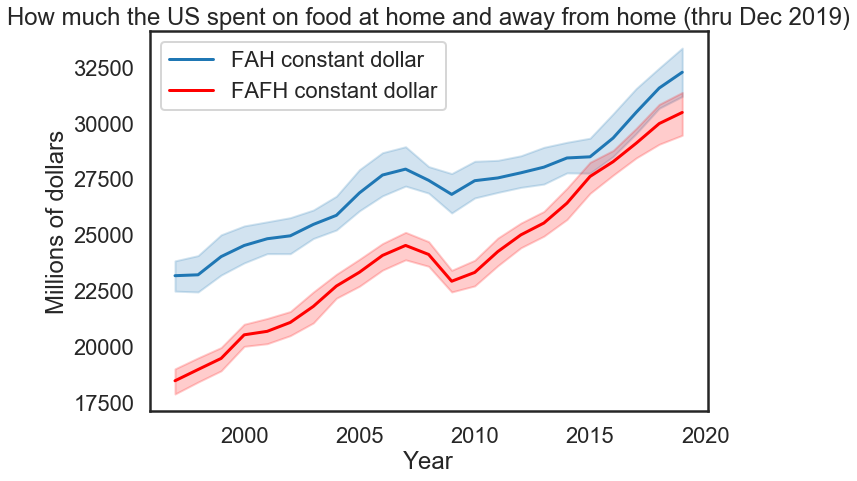

In [143]:
plotsize=(10,7)
sns.set_style("white")
sns.set_context("poster")
fig, ax = plt.subplots(figsize=plotsize)
sns.lineplot(ax=ax, x="Year", y="FAH_constdollar_million", label='FAH constant dollar', data=monthly_sales)
sns.lineplot(ax=ax, x="Year", y="FAFH_constdollar_million", color='red', label='FAFH constant dollar', data=monthly_sales)

ax.legend()

ax.set(xlabel='Year', ylabel='Millions of dollars', title='How much the US spent on food at home and away from home (thru Dec 2019)')

In the above graph, FAH = Food At Home, while FAFH = Food Away From Home. 

In the context of studying coronavirus' impact on food purchase behavior, this dataset is not very useful as it does not include data from 2020. However, the most recent data reflects that, in constant dollar adjustment (1988 dollars), food purchases made for the home (e.g. groceries) and food purchased away from home have come much closer in the last 5 years. More than ever, people are buying food at restaurants and spending more on it than they used to. This trend has certainly changed since the beginning of the coronavirus outbreak in early 2020, as restaurants and bars were forced to close for months on end and people stocked up on groceries for cooking at home. 

It's interesting to speculate what will happen upon relaxation of lockdown - will people resume spending just as much on takeout and restaurants as they will on food they cook at home? 

### Vegetables data

Let's look at US-wide fresh vegetable production and import trends. Once again, the data needed to examine the impact of coronavirus has not yet been published in this dataset, but the following exploration will still be useful in understanding patterns of healthy eating among Americans in the past several decades. When the needed data for COVID analysis is published, it can be included easily here, but we can at least study what has happened over the past 30 years leading up to the crisis for some context.

It is also interesting on its own to consider the relative proportion of each fresh vegetable commodity that is produced in the US vs. imported.

In [160]:
from dfply import *

# Veg stats data table generated here but not really needed in context

#veg_stats=(vegetables >> 
#           group_by(X.Commodity, X.Year) >> 
#           summarize(meanval=X.PublishValue.mean(), medianval=X.PublishValue.median(), stdev=X.PublishValue.std()) )
#veg_stats.head()

#### Fresh vegetables only, no potatoes


In [145]:
freshveg=(vegetables >> filter_by(X.EndUse=='Fresh'))
freshveg=(freshveg >> filter_by(X.Commodity != 'Potatoes', X.Commodity != 'Total vegetables'))
freshveg.head()

Decade  Year  Commodity EndUse      Category                     Item  \
27  1970's  1970  Asparagus  Fresh        Supply               Production   
28  1970's  1970  Asparagus  Fresh        Supply             Total Supply   
29  1970's  1970  Asparagus  Fresh  Availability                  Exports   
30  1970's  1970  Asparagus  Fresh  Availability    Domestic Availability   
31  1970's  1970  Asparagus  Fresh  Availability  Per Capita Availability   

              Unit  PublishValue       UniqueID  
27  Million pounds         97.40  Asparagus1970  
28  Million pounds         97.40  Asparagus1970  
29  Million pounds          6.80  Asparagus1970  
30  Million pounds         90.60  Asparagus1970  
31          Pounds          0.44  Asparagus1970

Potatoes were excluded because they are by far the most-consumed fresh vegetable in America and had to be removed as they dwarfed all others and made the visualization difficult to see.

##### Fresh vegetables by Item over time

Let's look at the different types of data that USDA reported on in this dataset.

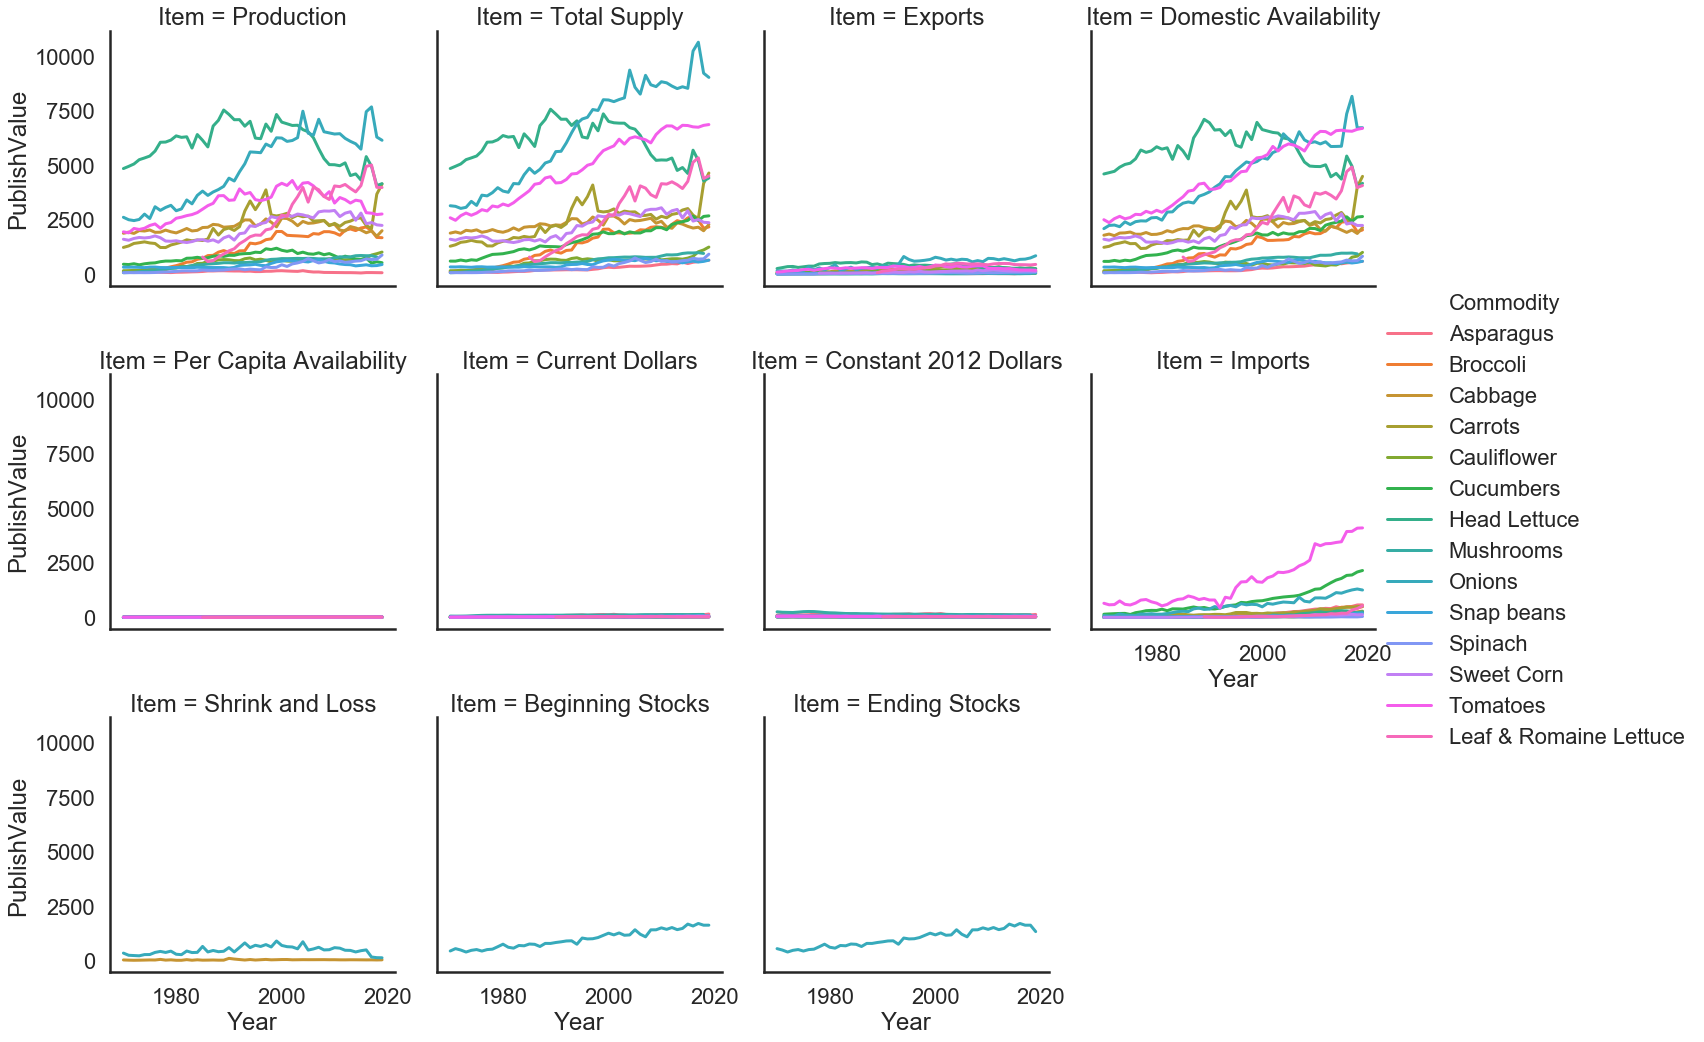

In [161]:
plotsize=(10,7)
sns.set_style("white")
g=sns.relplot(x="Year", y="PublishValue",
            hue="Commodity", col="Item", col_wrap=4,
            facet_kws=dict(sharex=True),
            kind="line", legend="full", data=freshveg)

There are multiple things we could consider here, but unfortunately no 'demand' or actual sales information. However, it may be interesting to explore `Production`, because this will perhaps mimic demand (on a delay). The overall popularity of a vegetable can also be implied by the volume of production in terms of rough order of magnitude and when looking at trends. 

Comparing `Production` to `Imports`, it's clear that most of the fresh veggies available in America were also produced in America, though more imports have occurred since the 90s. `Exports` are clearly a small fraction of the total fresh vegetable production in America. Other categories like `Shrink and Loss` would also be really interesting to explore, but less relevant to this conversation on buying habits and so will need to explored in another analysis.

Let's look further at what vegetables were produced in the US over time, and how popular each commodity is now. We will explore what % of each commodity was imported later on.

##### Production only

In [41]:
freshveg=(freshveg >> filter_by(X.Item == 'Production'))
freshveg.head()

Decade  Year    Commodity EndUse Category        Item            Unit  \
27   1970's  1970    Asparagus  Fresh   Supply  Production  Million pounds   
34   1970's  1970     Broccoli  Fresh   Supply  Production  Million pounds   
58   1970's  1970      Cabbage  Fresh   Supply  Production  Million pounds   
93   1970's  1970      Carrots  Fresh   Supply  Production  Million pounds   
101  1970's  1970  Cauliflower  Fresh   Supply  Production  Million pounds   

     PublishValue         UniqueID  
27           97.4    Asparagus1970  
34          109.2     Broccoli1970  
58         1866.9      Cabbage1970  
93         1218.2      Carrots1970  
101         151.9  Cauliflower1970

Focusing on production only, this gives a good indication of what the market demand in the US might have been (with a bit of delay).

[Text(0, 0.5, 'Million pounds'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'US Fresh vegetable production, 1970-2019')]

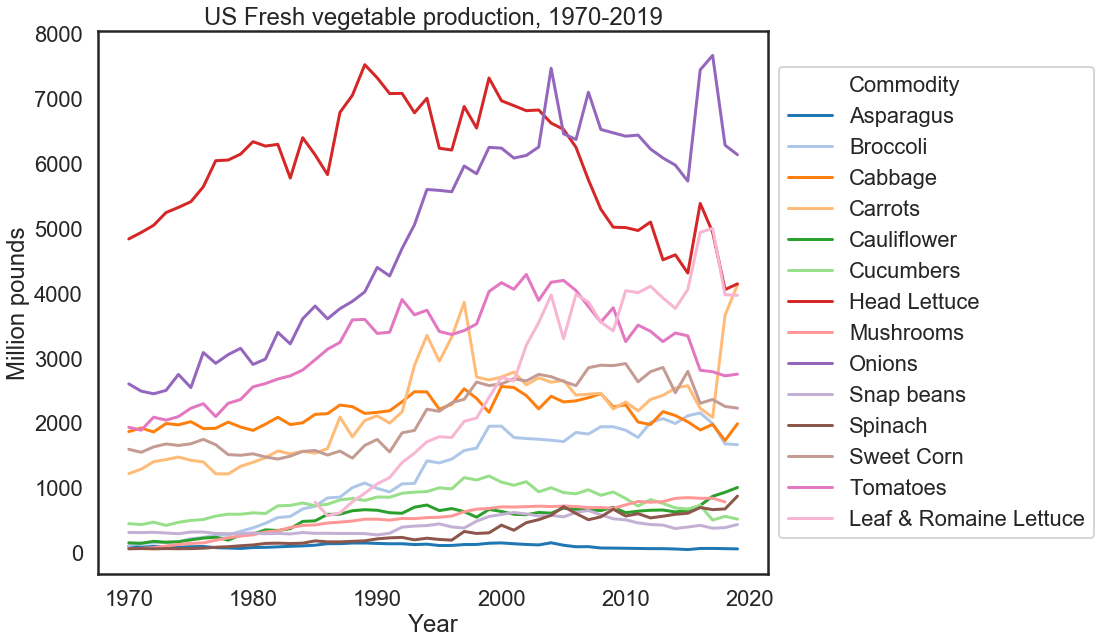

In [42]:
plotsize=(12,10)
sns.set_style("white")
fig, ax = plt.subplots(figsize=plotsize)
from bokeh.palettes import *
palette=sns.color_palette("tab20",14)
sns.set_context("poster")

g=sns.lineplot(x="Year", y="PublishValue", hue="Commodity",palette=palette, data=freshveg)
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

ax.set(xlabel='Year', ylabel='Million pounds', title='US Fresh vegetable production, 1970-2019')

Clearly, head lettuce and onions are produced in the highest quantities overall (excluding potatoes). Tomatoes, leaf and romaine lettuces, carrots, and sweet corn are the runners-up. These all make sense given the eating habits of the American public and given most of these ingredients' massive popularity as burger toppings and salad components. Between the 70s and today, head lettuce production has declined, while leaf and romaine lettuce has increased (convenience salad kits and bagged greens perhaps?). Onion production has somewhat stagnated since the early 2000s, but since then, onions have remained the most-produced in America by fresh weight. 

This graph notably does not include culinary fruits (apples, oranges, melons etc) or processed, frozen, or other end-uses of vegetables. 

An interactive version of this graph can be explored here:
https://observablehq.com/@kdebrota/us-fresh-vegetable-production-by-commodity-1970-2019

Let's look at a few individual vegetables as examples.

##### Carrots example

In [148]:
carrots=(vegetables>>(filter_by(X.Commodity=='Carrots', X.Item=='Production')))
#carrots.head()

[Text(0, 0.5, 'Million pounds'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'US Carrot production, 1970-2019')]

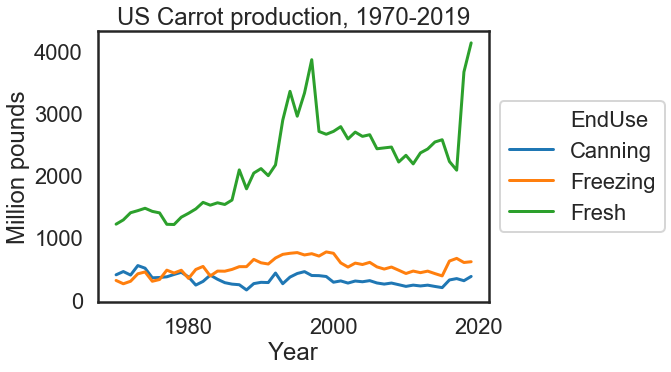

In [44]:
plotsize=(7,5)
sns.set_style("white")
fig, ax = plt.subplots(figsize=plotsize)
#palette=sns.color_palette("tab20",14)
sns.set_context("poster")

g=sns.lineplot(x="Year", y="PublishValue", hue="EndUse", data=carrots)
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
ax.set(xlabel='Year', ylabel='Million pounds', title='US Carrot production, 1970-2019')

Most carrots are produced for fresh produce usage, while fewer are grown for canning or freezing. It looks like there was some significant increase in fresh production in the past year or so.

##### Eggplant example

[Text(0, 0.5, 'Million pounds'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'US Eggplant production, 1970-2019')]

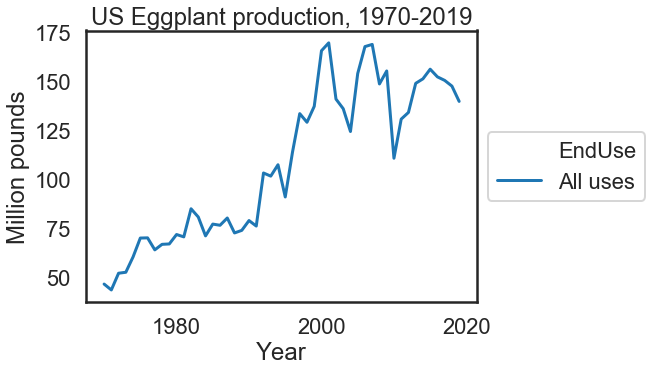

In [45]:
eggplant=(vegetables>>(filter_by(X.Commodity=='Eggplant', X.Item=='Production')))
plotsize=(7,5)
sns.set_style("white")
fig, ax = plt.subplots(figsize=plotsize)
#palette=sns.color_palette("tab20",14)
sns.set_context("poster")

g=sns.lineplot(x="Year", y="PublishValue", hue="EndUse", data=eggplant)
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
ax.set(xlabel='Year', ylabel='Million pounds', title='US Eggplant production, 1970-2019')

Compared to carrots, the y-axis shows that eggplant is far less popular and is produced in amounts several orders of magnitde lower. Its popularity has risen markedly since the 90s, though, as a fresh vegetable, and has approximately tripled since 1970.

According to this dataset, no eggplant is produced in the US for canning or freezing, or any other end use. This is not too surprising given eggplant's niche status and relatively low popularity in the US. 

##### Tomatoes example

[Text(0, 0.5, 'Million pounds'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'US Tomato production, 1970-2019')]

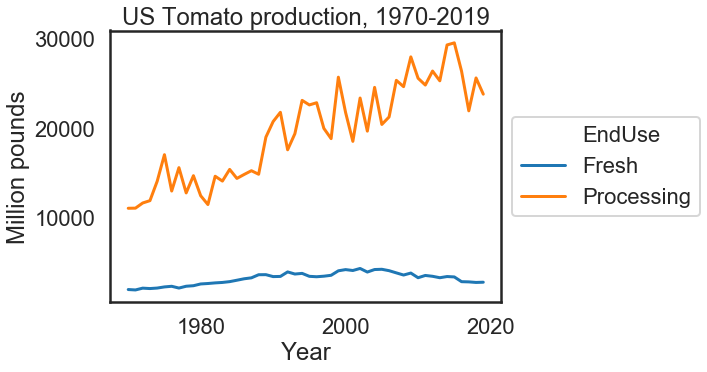

In [46]:
tomatoes=(vegetables>>(filter_by(X.Commodity=='Tomatoes', X.Item=='Production')))
plotsize=(7,5)
sns.set_style("white")
fig, ax = plt.subplots(figsize=plotsize)
#palette=sns.color_palette("tab20",14)
sns.set_context("poster")

g=sns.lineplot(x="Year", y="PublishValue", hue="EndUse", data=tomatoes)
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
ax.set(xlabel='Year', ylabel='Million pounds', title='US Tomato production, 1970-2019')

Unsurprisingly, tomatoes are one of the US's most popular and most-produced fresh vegetables. The huge majority (peaking a few years ago at nearly 30 billion pounds), however, are grown for processing, while a much smaller fraction (though still huge amounts) is grown for fresh usage. The prevalence of tomato-based products like soups, sauces, condiments, and flavorings makes this very understandable. Interestingly, we can see the fresh tomato production beginning to fall around 2000, despite processing production increasing continuously. The fresh tomato market might be moving out of the country (see section on import % below).

#### Total vegetable production

No handles with labels found to put in legend.


[Text(0, 0.5, 'Million pounds'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'Total US vegetable production, 1970-2019')]

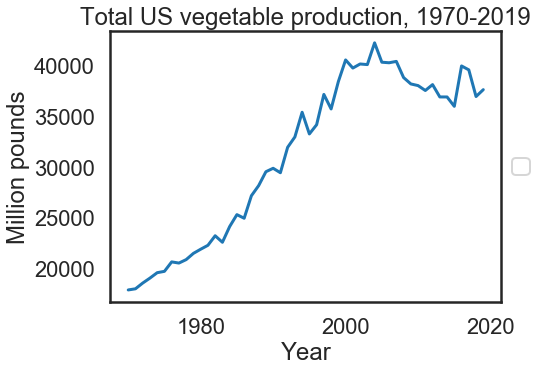

In [151]:
freshveg3=(vegetables >> filter_by(X.EndUse=='Fresh', X.Item == 'Production', X.Commodity =='Total vegetables'))
plotsize=(7,5)
sns.set_style("white")
fig, ax = plt.subplots(figsize=plotsize)
#palette=sns.color_palette("tab20",14)
sns.set_context("poster")

g=sns.lineplot(x="Year", y="PublishValue", data=freshveg3)
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
ax.set(xlabel='Year', ylabel='Million pounds', title='Total US vegetable production, 1970-2019')

Total fresh vegetable production looks like it peaked around 2000, and has been stagnating or declining ever since. Perhaps this is due to more imports of fresh produce, or decreased demand?

#### Correlation plot: vegetables data

Let's see if there are certain fresh vegetables whose production levels have gone up or down together over the years.

In [156]:
#this will take a while to run
g = sns.pairplot(freshveg_production, height=7)

There are a lot of variables, so it's a little difficult to interpret. However, there are some that clearly correlate together, for example tomatoes and cucumbers (looks like a linear relationship).  Let's see what the correlation coefficients are:

In [50]:
veg_corr=freshveg_production.corr()
veg_corr=veg_corr.unstack().sort_values(ascending=False)
veg_corr_highest = veg_corr.loc[veg_corr < 1]
veg_corr_highest.head(50)
#veg_corr_highest.unique()

Mushrooms               Broccoli                  0.972813
Broccoli                Mushrooms                 0.972813
Mushrooms               Year                      0.969263
Year                    Mushrooms                 0.969263
                        Leaf & Romaine Lettuce    0.966401
Leaf & Romaine Lettuce  Year                      0.966401
Onions                  Broccoli                  0.964166
Broccoli                Onions                    0.964166
Year                    Broccoli                  0.954562
Broccoli                Year                      0.954562
Spinach                 Leaf & Romaine Lettuce    0.952673
Leaf & Romaine Lettuce  Spinach                   0.952673
                        Onions                    0.949277
Onions                  Leaf & Romaine Lettuce    0.949277
Year                    Spinach                   0.947996
Spinach                 Year                      0.947996
Leaf & Romaine Lettuce  Broccoli                  0.9413

### Percent imported

Relatively how many of the total available fresh vegetables were imported, and how has that changed over the past few decades? This might tell us a little more about the total demand for certain fresh foods by the American public. 

Importing food from outside the country in this sector might change as well after/during COVID if purchasing and cooking habits change long-term. It's hard to say how things will vary in absence of strong foodservice purchasing, though. Perhaps we will see a decline in the 'burger toppings' vegetable production if more of the US is eating out less? When the necessary data is published, we can explore further. 

For now, analyzing the % imports will just prepare us to understand the current patterns so that post-COVID comparisons can be made.

#### Adding columns for % calculation

In [63]:
# Item = Total Supply and Item = Imports
freshveg2=(vegetables >> filter_by(X.EndUse=='Fresh'))
imports_supply = freshveg2 >> mask( X.Item == 'Imports')
totalsupply = freshveg2 >> mask ( X.Item == 'Total Supply')

importsdata = totalsupply.merge(imports_supply, how = 'left', on = 'UniqueID')
#imports_supply.head()
importsdata = importsdata.rename(columns = {"PublishValue_x":"Total Supply",'PublishValue_y':'Imports'}) 
importsdata['pct_imported'] = (importsdata['Imports']/importsdata['Total Supply'])*100
importsdata.head()


Decade_x  Year_x  Commodity_x EndUse_x Category_x        Item_x  \
0   1970's    1970    Asparagus    Fresh     Supply  Total Supply   
1   1970's    1970     Broccoli    Fresh     Supply  Total Supply   
2   1970's    1970      Cabbage    Fresh     Supply  Total Supply   
3   1970's    1970      Carrots    Fresh     Supply  Total Supply   
4   1970's    1970  Cauliflower    Fresh     Supply  Total Supply   

           Unit_x  Total Supply         UniqueID Decade_y  Year_y  \
0  Million pounds          97.4    Asparagus1970      NaN     NaN   
1  Million pounds         109.2     Broccoli1970      NaN     NaN   
2  Million pounds        1874.6      Cabbage1970   1970's  1970.0   
3  Million pounds        1274.4      Carrots1970   1970's  1970.0   
4  Million pounds         152.0  Cauliflower1970   1970's  1970.0   

   Commodity_y EndUse_y Category_y   Item_y          Unit_y  Imports  \
0          NaN      NaN        NaN      NaN             NaN      NaN   
1          NaN      NaN        NaN      NaN             NaN      NaN   
2      Cabbage    Fresh     Supply  Imports  Million pounds      7.7   
3      Carrots    Fresh     Supply  Imports  Million pounds     56.2   
4  Cauliflower    Fresh     Supply  Imports  Million pounds      0.1   

   pct_imported  
0           NaN  
1           NaN  
2      0.410754  
3      4.409918  
4      0.065789

#### Graphing import %

[Text(0, 0.5, 'Percent of total supply imported'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'US Fresh vegetable % Imports by Commodity, 1970-2019')]

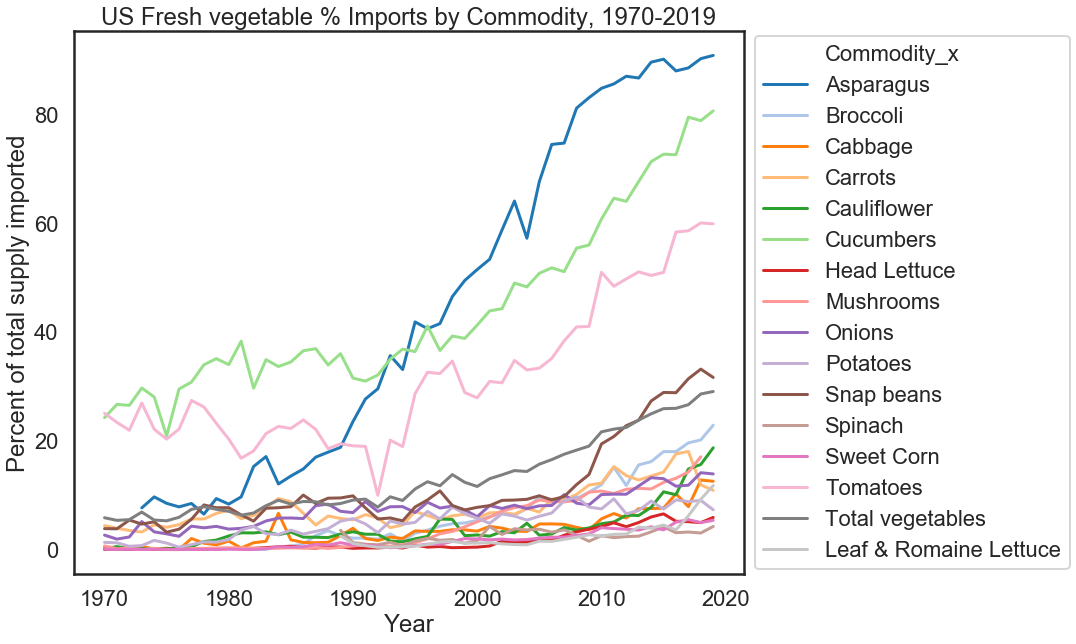

In [69]:
plotsize=(12,10)
sns.set_style("white")
fig, ax = plt.subplots(figsize=plotsize)
from bokeh.palettes import *
palette=sns.color_palette("tab20",16)
sns.set_context("poster")

g=sns.lineplot(x="Year_x", y="pct_imported", hue="Commodity_x",palette=palette, data=importsdata)
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

ax.set(xlabel='Year', ylabel='Percent of total supply imported', title='US Fresh vegetable % Imports by Commodity, 1970-2019')



From the above, we can see that the majority of fresh vegetables available in America were produced in America, with the exception of asparagus, cucumbers, and tomatoes. Overall, there's a trend toward importing more of our fresh veggies, although this has only begun in the last decade for many varieties (e.g. cauliflower, broccoli, leaf/romaine lettuce, and mushrooms). 

More of America's supply of asparagus, cucumbers, and tomatoes have always been imported, and the fraction that is imported is only increasing with time. Nearly 100% of asparagus is produced elsewhere, with cucumbers not far behind. More than half of fresh tomatoes are produced outside the country. Are these products which have grown in popularity in recent years, hence the demand for importing rather than growing? Unfortunately we don't actually have demand data. However, for tomatoes (see tomatoes example) we can see that production has remained relatively stable in the past decade or so, while the percent of total supply imported has risen. This could be a sign that we as a country have begun importing more of our routine fresh vegetable needs (at least for this steadfastly popular variety) as our population grows.

### Coronavirus data

#### Fixing the data types

In [133]:
covid.dtypes.value_counts()
# Change date column to datetime type
covid['Date'] = pd.to_datetime(covid['Date'])
covid['Date'].dtypes

dtype('<M8[ns]')

#### Cumulative positive US COVID cases

In [163]:
# redundant plot - see below

#plotsize=(8,5)
#sns.set_style("white")
#sns.set_context("notebook")
#fig, ax = plt.subplots(figsize=plotsize)
#g=sns.lineplot(ax=ax, x="Date", y="Positive", data=covid)

#ax.set(xlabel='Date', ylabel='Cumulative positive coronavirus cases, US-wide', title='US COVID cases, cumulative')
#for item in g.get_xticklabels():
#    item.set_rotation(45)

#### US COVID cases, deaths, recoveries cumulative

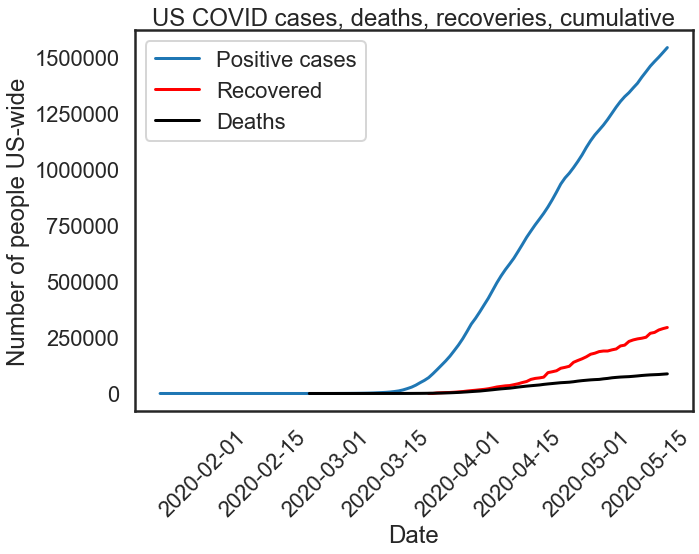

In [135]:
plotsize=(10,7)
sns.set_style("white")
sns.set_context("poster")
fig, ax = plt.subplots(figsize=plotsize)
g=sns.lineplot(ax=ax, x="Date", y="Positive", label='Positive cases', data=covid)
sns.lineplot(ax=ax, x="Date", y="Recovered", color='red', label='Recovered', data=covid)
sns.lineplot(ax=ax, x="Date", y="Deaths", color='black', label='Deaths', data=covid)
ax.legend()

ax.set(xlabel='Date', ylabel='Number of people US-wide', title='US COVID cases, deaths, recoveries, cumulative')
for item in g.get_xticklabels():
    item.set_rotation(45)

Now that the case loads are visualized, it will be interesting to consider how food sales changed as the case load increased.

### Combining the data with COVID-case data

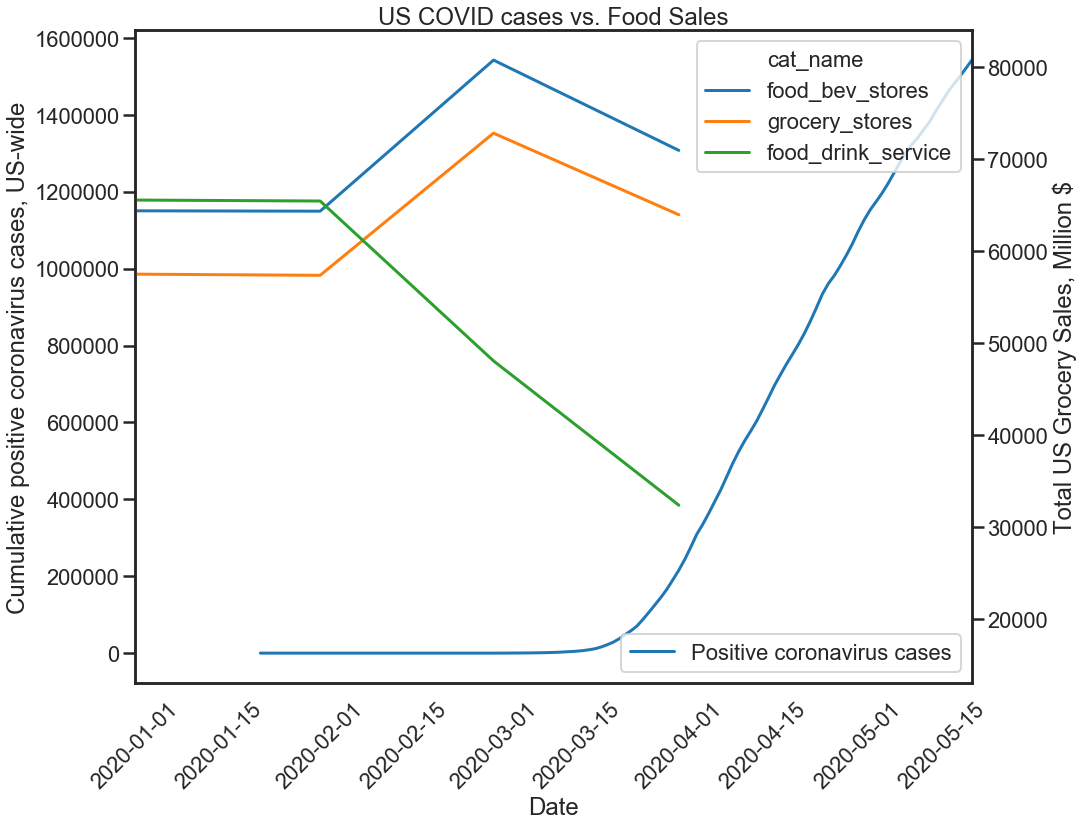

In [166]:
# Combine census (grocery store sales/foodservice sales) data with COVID case data, US-wide

sns.set_context("poster")
plotsize=(15,12)
sns.set_style("white")
fig, ax = plt.subplots(figsize=plotsize)
g=sns.lineplot(ax=ax, x="Date", y="Positive", label='Positive coronavirus cases', data=covid)
ax2 = plt.twinx()
sns.lineplot(ax=ax2, x="per_name", y='val', hue='cat_name', data=census_adj)
ax.set(xlabel='Date', ylabel='Cumulative positive coronavirus cases, US-wide', title='US COVID cases vs. Food Sales')
ax2.set(xlabel='', ylabel='Total US Grocery Sales, Million $')
ax.set(xlim=(datetime.date(2020,1,1), datetime.date(2020,5,20)))
ax2.set(xlim=(datetime.date(2020,1,1), datetime.date(2020,5,20)))
ax.legend(loc='lower right')
ax2.legend()

for item in g.get_xticklabels():
    item.set_rotation(45)

It's clear that we don't have enough data for the most recent time period, but we can clearly see that the change in food sales occurred before the case load became severe in March 2020. After the initial 'stock-up' phase in March, it appears things have begun to retreat to normal for grocery stores and other food/beverage stores in April. However, restaurants are still taking a massive hit, and have not begun to recover at all as of April. As people are slowly returning to (closer to) their normal eating patterns, they are still not frequenting restaurants (as of April). Because many states began reopening in mid-late May, we could see some beginning of recovery in may or June. 

What about the rest of the economy vs. caseload?

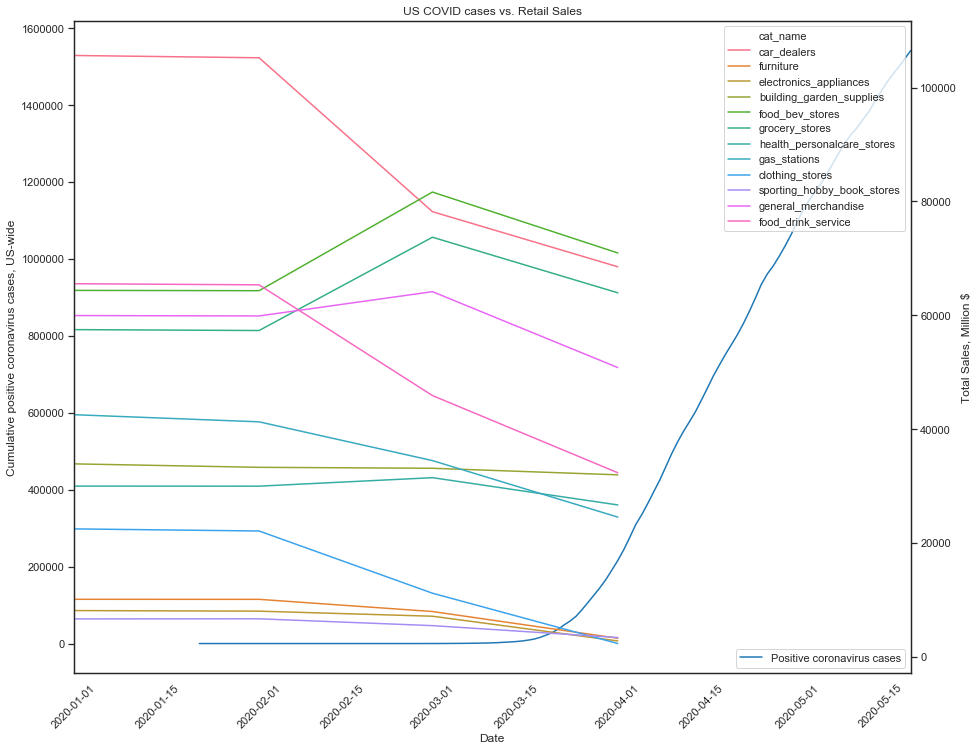

In [165]:
# Combine census (all sectors) data with COVID case data, US-wide

sns.set_context("notebook")
plotsize=(15,12)
sns.set_style("white")
fig, ax = plt.subplots(figsize=plotsize)
g=sns.lineplot(ax=ax, x="Date", y="Positive", label='Positive coronavirus cases', data=covid)
ax2 = plt.twinx()
sns.lineplot(ax=ax2, x="per_name", y='val', hue='cat_name', data=census_econ_adj)
ax.set(xlabel='Date', ylabel='Cumulative positive coronavirus cases, US-wide', title='US COVID cases vs. Retail Sales')
ax2.set(xlabel='', ylabel='Total Sales, Million $')
ax.set(xlim=(datetime.date(2020,1,1), datetime.date(2020,5,20)))
ax2.set(xlim=(datetime.date(2020,1,1), datetime.date(2020,5,20)))
ax.legend(loc='lower right')
ax2.legend()

for item in g.get_xticklabels():
    item.set_rotation(45)

Other retail sectors mirror the food service data, reacting before the case load increased dramatically. Detrimental decreases in food service and other sectors of the economy (see interactive % change analyses graphs on Observable) show the severity of what has happened so far. It's clear that there is a long way to go in almost every sector before we will be back to where we were at the beginning of the year. 